# Movie Recommendation System
This notebook trains and evaluates a simple movie recommender using content-based filtering.

In [3]:

#7
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from google.colab import files

# Load modified movie dataset
movies = pd.read_csv("movies-1.csv")
movies.head()

,movieId,title,genres
0,1,Toy Story,Animation|Comedy|Family
1,2,Jumanji,Adventure|Children|Fantasy
2,3,Grumpier Old Men,Comedy|Romance
3,4,Waiting to Exhale,Comedy|Drama|Romance
4,5,Father of the Bride Part II,Comedy


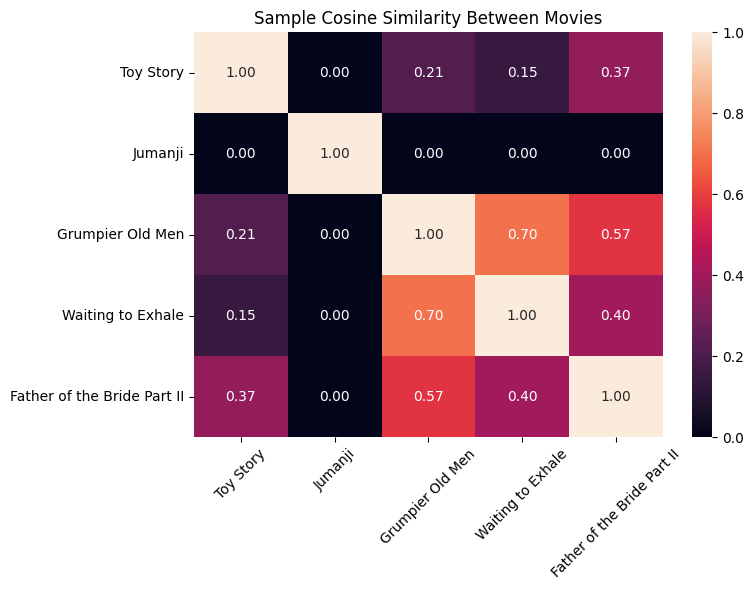

In [5]:
#8

# Plot similarity heatmap
plt.figure(figsize=(8,6))
sns.heatmap(cosine_sim[:5,:5], annot=True, fmt=".2f", xticklabels=movies['title'][:5], yticklabels=movies['title'][:5])
plt.title("Sample Cosine Similarity Between Movies")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [4]:
# Fill missing genres with empty string
movies['genres'] = movies['genres'].fillna('')

# Convert genres to TF-IDF matrix
tfidf = TfidfVectorizer(token_pattern=r'(?u)\b\w+\b')
tfidf_matrix = tfidf.fit_transform(movies['genres'])

# Compute cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

# Save files for deployment
with open("cosine_similarity.pkl", "wb") as f:
    pickle.dump(cosine_sim, f)

with open("tfidf_vectorizer.pkl", "wb") as f:
    pickle.dump(tfidf, f)

movies.to_csv("movies_clean.csv", index=False)
print("✓ Saved cosine_similarity.pkl, tfidf_vectorizer.pkl, movies_clean.csv")

# Download files
files.download("cosine_similarity.pkl")
files.download("tfidf_vectorizer.pkl")
files.download("movies_clean.csv")

✓ Saved cosine_similarity.pkl, tfidf_vectorizer.pkl, movies_clean.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>